In [ ]:
# Import matplotlib and numpy libraries!
from matplotlib import pyplot as plt
import numpy as np


We will explore some of the particle in a box scaling arguments mentioned in Episode 5 of the Goeppert Mayer Gauge with special guest [Prof. Justin Caram](https://caramlab.chem.ucla.edu/) on [Short Wave Infrared](https://www.edmundoptics.com/knowledge-center/application-notes/imaging/what-is-swir/) radiation (SWIR).  In particular, we explored the topic of how to create organic chromophores that are good absorbers and emitters in the SWIR. 

We discussed the particle in a box model as being particularly useful for thinking about electronic transitions in [cyanine dyes](https://en.wikipedia.org/wiki/Cyanine).  While this model would also suggest that we can abritrarily red-shift such dyes by increasing the number of conjugated pi units, and that while we do, the cyanine dyes would become better absorbers and emitters.  
As we discuss in the episode, this is not actually true for reasons that are very interesting and somewhat complicated (please listen to find out more!).  
That said, the scaling relationships suggested by the particle in a box model are interesting in their own right, and useful in some limited contexts, so we try to illustrate them here!

First, let's recall the expression for the energy eigenvalues of the particle in a box of length $L$, 
\begin{equation}
E_n = \frac{\hbar^2 \pi^2 n^2}{2 m L^2}
\end{equation}

where following the discussion in [this article](https://pubs.acs.org/doi/10.1021/ed084p1840), we 
will approximate the length of a cyanine dye as 
\begin{equation}
L = a \left( k + 1 \right) + b
\end{equation}
where $a$ = 2.49 Angstroms, $b$ = 5.69 Angstroms, and $k$ is the number of -CH=CH- units in the dye.  

The relevance of this models comes from the fact that the the absorption behavior is dominated by transitions between the HOMO and LUMO orbitals in these conjugated dyes, and the particle in a box eigenfunctions / eigenvalues provide supprisingly reasonable models for these orbitals.  As the number of
-CH=CH- units ($k$) increases, the quantum number associated with the HOMO increases as follows:
\begin{equation}
n_{HOMO} = k + 3.
\end{equation}

Let's then explore how the HOMO-LUMO gap (which approximates the absorption energy) scales with the number of these units and the length of the box.

k values
[1. 2. 3.]
L values
[1.067e-09 1.316e-09 1.565e-09]
lambda absorption values
[417.54566662 519.68088741 621.87483504]


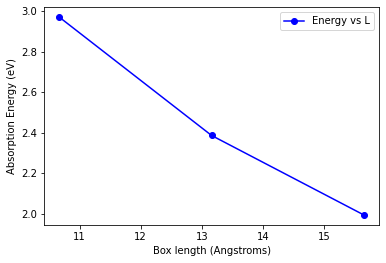

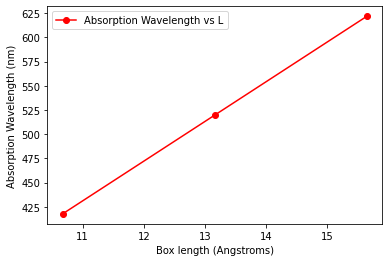

In [ ]:
# create an array for k, where k is the number of -CH=CH- units.
# basically each value of k defines a new cyanine dye with a longer "box length"
k = np.linspace(1,3,3)

# a constant in SI units related to the average -CH=CH- unit length
a = 2.49e-10
# b constant in SI units related to the length of the terminal moities in 
# the cyanine dyes
b = 5.69e-10

# create an array of L values, where L is the length of the box,
# for each distinct dye defined by the k array
L = a * (k + 1) + b

# create an array of quantum numbers associated with the HOMOs of each dye
n_homo = k + 3

# create an array of quantum numbers associated with the LUMOs of each dye
n_lumo = k + 4

# need reduced Planck's constant and the mass of the electron in SI units as well
hbar = 1.054e-34
m = 9.109e-31

# conversion from SI units of energy (Joules) to electron volts
joules_to_ev = 6.242e18


# compute the energies of each HOMO in SI units
E_homo = hbar ** 2 * np.pi ** 2 * n_homo ** 2 / (2 * m * L ** 2)
# compte the energies of each LUMO in SI units
E_lumo = hbar ** 2 * np.pi ** 2 * n_lumo ** 2 / (2 * m * L ** 2)

# energy gaps in eV
E_gap = (E_lumo - E_homo) * joules_to_ev

# absorption wavelength in nm 
lambda_abs = 1240/E_gap

print("k values")
print(k)
print("L values")
print(L)
print("lambda absorption values")
print(lambda_abs) 
# plot of the absorption energy of each dye vs it's "box length"
plt.plot(L*1e10, E_gap, 'bo-', label='Energy vs L')
plt.xlabel("Box length (Angstroms)")
plt.ylabel("Absorption Energy (eV)")
plt.legend()
plt.show()

# plot of the absorption wavelength of each dye vs it's "box length"
plt.plot(L*1e10, lambda_abs, 'ro-', label='Absorption Wavelength vs L')
plt.xlabel("Box length (Angstroms)")
plt.ylabel("Absorption Wavelength (nm)")
plt.legend()
plt.show()



The second trend of interest is the scaling of the transition dipole moment with the size of the cyanine system, which we can again estimate from the particle in a box system.  Here, we want to compute the transition dipole moment between the particle in a box energy eigenfunctions that are reasonable models for the HOMO and LUMO orbitals:
\begin{equation}
\mu_{n_i\rightarrow n_f} = \int_0^L \psi_{n_f}(x) \: \hat{\mu} \: \psi_{n_i}(x) dx.
\end{equation}
Here, the particle in a box energy eigenfunctions have the form
\begin{equation}
\psi_n(x) = \sqrt{\frac{2}{L}} \: {\rm sin}\left( \frac{n \pi x}{L} \right),
\end{equation}
and the transition dipole operator has the form
\begin{equation}
\hat{\mu} = -e x
\end{equation}
where $e$ is the electron charge and $x$ is displacement or position operator along the $x$ axis.  The full expression for the transition dipole moment integrals can be found on page 5 of the supporting information of [this paper](https://pubs.acs.org/doi/abs/10.1021/acsphotonics.6b00773).  

Given that the quantum numbers for the HOMO-LUMO transitions always differ by one, the relevant HOMO-LUMO transition dipole moments from the particle in a box model take on a fairly simple form as follows:
\begin{equation}
\mu_{i\rightarrow f} = 2eL \left(  \frac{1}{( n_f + n_i )^2 \pi^2 } - \frac{1}{\pi^2} \right).
\end{equation}
From this, we can see that the transition dipole moment approaches a value of $\frac{-2eL}{\pi^2}$ in the limit of large $k$ (which is also the limit of large $L$); thus from this particle in a box model, we would expect the transition dipole momento to scale linearly with the length of the cyanine dye system.  We see from the plot below, this is the case!  Note in the podcast, we could not remember how it scaled and speculated it scaled as the square root of $L$, so we were being too conservative by a factor of $L^{1/2}$!

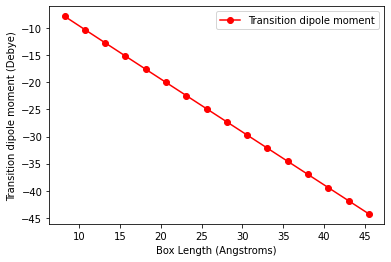

In [ ]:
# charge of the electron
ec = 1.602e-19
# compute the transition dipole moment in SI units for the above values of L
mu = 2 * ec * L * (1/((n_lumo + n_homo)**2 * np.pi**2) - 1/np.pi**2)

# conversion from SI units of dipole to Debye
cm_to_debye = 1/3.33564e-30 

# plot of the transition dipole moment of the particle in a box
# HOMO-LUMO transitions vs "box length"
plt.plot(L*1e10, mu*cm_to_debye, 'ro-', label='Transition dipole moment')
plt.xlabel("Box Length (Angstroms)")
plt.ylabel("Transition dipole moment (Debye)")
plt.legend()
plt.show()

# Sample Preparation:

The cyanine dyes have very strong absorbance, so the solutions you make up should be quite dilute.  To a rough approximation, the molar absorption coefficient for each dye in ethanol solution is $e \approx 2\cdot 10^5 M^{-1} cm^{-1}$, and the molecular weight for each dye is $M.W. \approx 500 g \: mol^{-1}$ (see [here](https://gustavus.edu/chemistry/pchem/Absorption_Dyes.htm) for more precise data if you are interested).

Using those crude figures, make a solution of your dye in 100 mL of ethanol such that the absorbance is $A \approx 1$, where $A$ can be computed as
\begin{equation}
A = e \cdot c \cdot l,
\end{equation}
where $l$ is the path-length of the sample ($l = 1 cm$), $c$ is the concentration in molarity ($M = mol \: L^{-1}$), and $e$ is the molar absorption coefficient as given above.  Complete the python cell below to compute the mass of dye you should measure out to make your solution.


In [ ]:
# molar absorption coefficient
e = 2e5
# pathlength in cm
l = 1
# approximate molar mass of the cyanine dyes
mm = 500
# desired absorbance 
A = 1

c= A /(l*e)
print("target concentration is ",c)

# volume of the ethanol solution in liters
V = 0.1

m_target = c * V * mm

print("target mass is ",m_target)
  

target concentration is  5e-06
target mass is  0.00025000000000000006


Record the mass and concentration data for each dye in the table below.
In addition, look up the chemical structure of each dye and determine the $k$ number (number -CH=CH- units), the box-length in Angstroms, and
the quantum number of the HOMO orbital and record in the table below.
Also record the wavelength at which the absorbance is found to peak from your UV/Vis measurements in the table below.

- Dye 1: 3,3' diethylthiacarbocyanine iodide

- Dye 2: 3,3' diethylthiadicarbocyanine iodide

- Dye 2: 3,3' diethylthiatricarbocyanine iodide
# Table of data for each dye

| Dye | Mass | Concentration | $k$ | $L$ | $n_{HOMO}$ | $\lambda_{max}$ | $\lambda_{pib}$ |
| :-: | :-: | :-: | :-: | :-: |:-: |:-: | :-:|
| 1   | 0.0002 g  | 4 *10^-6 M  | 1   | 10.67 $\overset{\circ}{A}$ | 4 |559 nm| 417 nm |
| 2   |   0.00035 g| 6.9 *10^-6 M  | 2   | 13.16 $\overset{\circ}{A}$ | 5 |651 nm| 519 nm |
| 3   | 0.0003 g  |  6 *10^-6 M | 3   | 15.65 $\overset{\circ}{A}$  | 6 |765 nm | 621 nm |

*Note* the values of $L$, $n_{HOMO}$, and $\lambda_{pib}$ are computed using the formulae in the first main cell of this notebook.

Recording the data above, and answering the questions below, will constitute the completion of this lab report.  To submit your completed notebook, simply save the notebook and Share a link by email to foleyj10@wpunj.edu with "Lab 1 Notebook" in the subject line.  Make sure the permissions are "Anyone with link can edit" before sending me the link. 

### Question 1: Why does the quantum yield for cyanine dyes go down as the dyes get longer (and the absorbance / emission red shifts)?






We've acknowledged that the particle in a box model works remarkably well for modeling the $\pi$ electrons in cyanine dyes despite the simplicity of the model itself.  One obvious oversimplification is the lack of potential experienced by the electrons in the PIB model.  Jochen Autschbach's paper suggests the following model potential:
\begin{equation}
V'(x) = A {\rm cos}\left(\frac{2 m \pi}{L}  \right)
\end{equation}
where $m = 2k + 5$, $L$ is the box length from before, and $A$ quantifies the magnitude of the potential (a value of 0.13 atomic units is appropriate).  From first-order perturbation theory, the corrections to the PIB energies resulting from this potential are as follows:
\begin{equation}
E'_n = \int_0^L \psi_n^*(x) V'(x) \psi_n(x) dx,
\end{equation}
and the total energy of state $n$ to first-order in perturbation theory is
\begin{equation}
E_n^{(1)} = E_n^{(0)} + E'_n.
\end{equation}
where $E_n^{(0)}$ is the energy of the $n^{th}$ eigenstate of the particle in a box *without* a potential. 
### Question 2:  For the cyanine dye defined by $k = 5$, plot $V'(x)$ along with the PIB function that models the HOMO of this dye.

### Question 3:  For the cyanine dye defined by $k = 5$, plot $V'(x)$ along with the PIB function that models the LUMO of this dye.



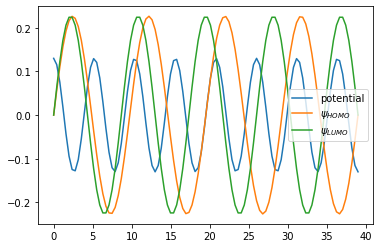

In [ ]:
### Question 2 and 3:
# a constant in atomic units!
a = 2.49e-10 * 18897261339.2125
# b constant in atomic units
b = 5.69e-10 * 18897261339.2125

# for Question 2, we take k to be 5
k = 5
### compute the length in atomic units! L = a * (k + 1) + b
L = a * (k + 1) + b

# define our constants for our potential!
A = 0.13
m = 2*k + 5

# define an array of x-values that you will evaluate your potential and your wavefunction on!
x = np.linspace(0, L, 100)
Vp = A * np.cos(m * np.pi * x / L)

# this will be the HOMO orbital: sqrt(2/L)*sin(n_homo * pi * x / L)
n_homo = k+3
n_lumo = k+4
psi_homo = np.sqrt(2/L) * np.sin(n_homo * np.pi * x / L)
psi_lumo = np.sqrt(2/L) * np.sin(n_lumo * np.pi * x / L)


plt.plot(x, Vp, label="potential")
plt.plot(x, psi_homo, label="$\psi_{HOMO}$")
plt.plot(x, psi_lumo, label="$\psi_{LUMO}$")
plt.legend()
plt.show()




### Question 4: For the same cyanine dye system defined by $k=5$, plot the integrand for $E'_{HOMO}$ and the integrand for $E'_{LUMO}$



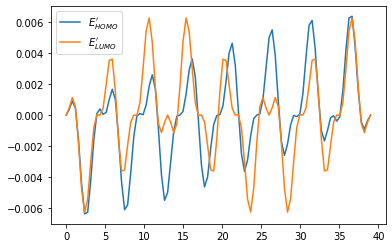

In [ ]:

### I want to compute my integrand for psi_homo * V'(x) * psi_homo
integrand_homo = psi_homo * Vp * psi_homo 
integrand_lumo = psi_lumo * Vp * psi_lumo

plt.plot(x, integrand_homo, label="$E_{HOMO}'$")
plt.plot(x, integrand_lumo, label="$E_{LUMO}'$")
plt.legend()
plt.show()




### Question 5: For the same cyanine dye system defined by $k=5$, compute $E'_{HOMO}$ and $E'_{LUMO}$

*Hint*: You can integrate function data stored in an array `y` against the x-axis data stored in array `x` as follows:

`integral = np.trapz(y, x)`


### Does the inclusion of $V'(x)$ change the absorption energies of the cyanine dyes to first order of perturbation theory?  Explain your answer using the results obtained above.



In [ ]:
### compute E'_homo and E'_lumo
E_homo_correction = np.trapz(integrand_homo, x)
E_lumo_correction = np.trapz(integrand_lumo, x)

print("Correction to E_homo is ",E_homo_correction)
print("Correction to E_lumo is ",E_lumo_correction)


Correction to E_homo is  5.2800645800044066e-17
Correction to E_lumo is  7.345469718589293e-18
